## Sentiment Analysis of Lyrics of Billboard Top 100 Songs from 1965-2015

In [1]:
import nltk
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("billboard_lyrics_1964-2015.csv", encoding = "ISO-8859-1")
df["Lyrics"] = df["Lyrics"].apply(lambda x: str(x))

In [19]:
 df=df.dropna(subset=["Lyrics"])  

### Get List of Positive and Negative Words from ptrckprry.com

In [7]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

### Create function to compute sentiment

In [23]:
def do_pos_neg_sentiment_analysis(text_list,debug=False):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    for text in text_list:
        cpos = cneg = lpos = lneg = 0
        for word in word_tokenize(text[1]):
            if word in positive_words:
                if debug:
                    print("Positive",word)
                cpos+=1
            if word in negative_words:
                if debug:
                    print("Negative",word)
                cneg+=1
        try:
            results.append((text[0],((cpos/len(word_tokenize(text[1])))+(cneg/len(word_tokenize(text[1]))))/2))
        except:
            pass
    return results

# do_pos_neg_sentiment_analysis([(Year,dec1)])

In [39]:
sentiment_list = []
for year in range(1965, 2016):
    lyrics =  df[df["Year"]==year]["Lyrics"].values
    lyrics = ' '.join(lyrics)
    sentiment =do_pos_neg_sentiment_analysis([(year,lyrics)])
    sentiment_list.append(sentiment)                   

In [40]:
final_list=[]
for i in range(len(sentiment_list)):
    year, sentiment =sentiment_list[i][0]
    final_list.append((year,sentiment))

In [42]:
sentiment_df = pd.DataFrame(final_list)

In [44]:
sentiment_df.columns = ["Year", "Average_Sentiment"]

### Plot Average Sentiment By Year

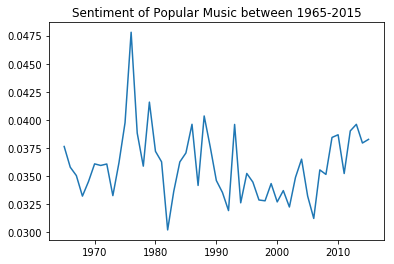

In [45]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.plot(sentiment_df.Year, sentiment_df.Average_Sentiment, label='linear')
plt.title("Sentiment of Popular Music between 1965-2015")
plt.show()